In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()  # Replace MNIST with emotion dataset later
    x_train = x_train[..., np.newaxis] / 255.0  # Normalize and add channel dimension
    x_test = x_test[..., np.newaxis] / 255.0
    y_train = to_categorical(y_train, 10)  # One-hot encode labels
    y_test = to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [3]:
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation="relu", name="conv_layer1")(inputs)
    x = MaxPooling2D((2, 2), name="max_pool1")(x)
    x = Conv2D(64, (3, 3), activation="relu", name="conv_layer2")(x)
    x = MaxPooling2D((2, 2), name="max_pool2")(x)
    x = Flatten(name="flatten")(x)
    outputs = Dense(10, activation="softmax", name="output")(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

In [4]:
def visualize_activation_maps(model, image):
    layer_outputs = [layer.output for layer in model.layers if "conv" in layer.name]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    
    activations = activation_model.predict(image[np.newaxis, ...])
    
    for i, activation in enumerate(activations):
        num_filters = activation.shape[-1]
        size = activation.shape[1]
        display_grid = np.zeros((size, size * num_filters))
        
        for j in range(num_filters):
            activation_image = activation[0, :, :, j]
            activation_image -= activation_image.mean()
            activation_image /= activation_image.std() + 1e-5
            activation_image = np.clip(activation_image, 0, 1)
            display_grid[:, j * size: (j + 1) * size] = activation_image
        
        plt.figure(figsize=(20, 20))
        plt.title(f"Activation Map for Layer {model.layers[i + 1].name}")
        plt.imshow(display_grid, aspect="auto", cmap="viridis")
        plt.axis("off")
        plt.show()

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()
model = build_model((28, 28, 1))

model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8609 - loss: 0.4778 - val_accuracy: 0.9811 - val_loss: 0.0612
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9797 - loss: 0.0673 - val_accuracy: 0.9853 - val_loss: 0.0456
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9862 - loss: 0.0456 - val_accuracy: 0.9874 - val_loss: 0.0390


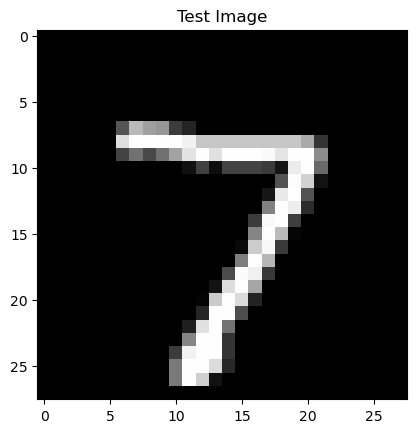

In [6]:
test_image = x_test[0]
plt.imshow(test_image.squeeze(), cmap="gray")
plt.title("Test Image")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


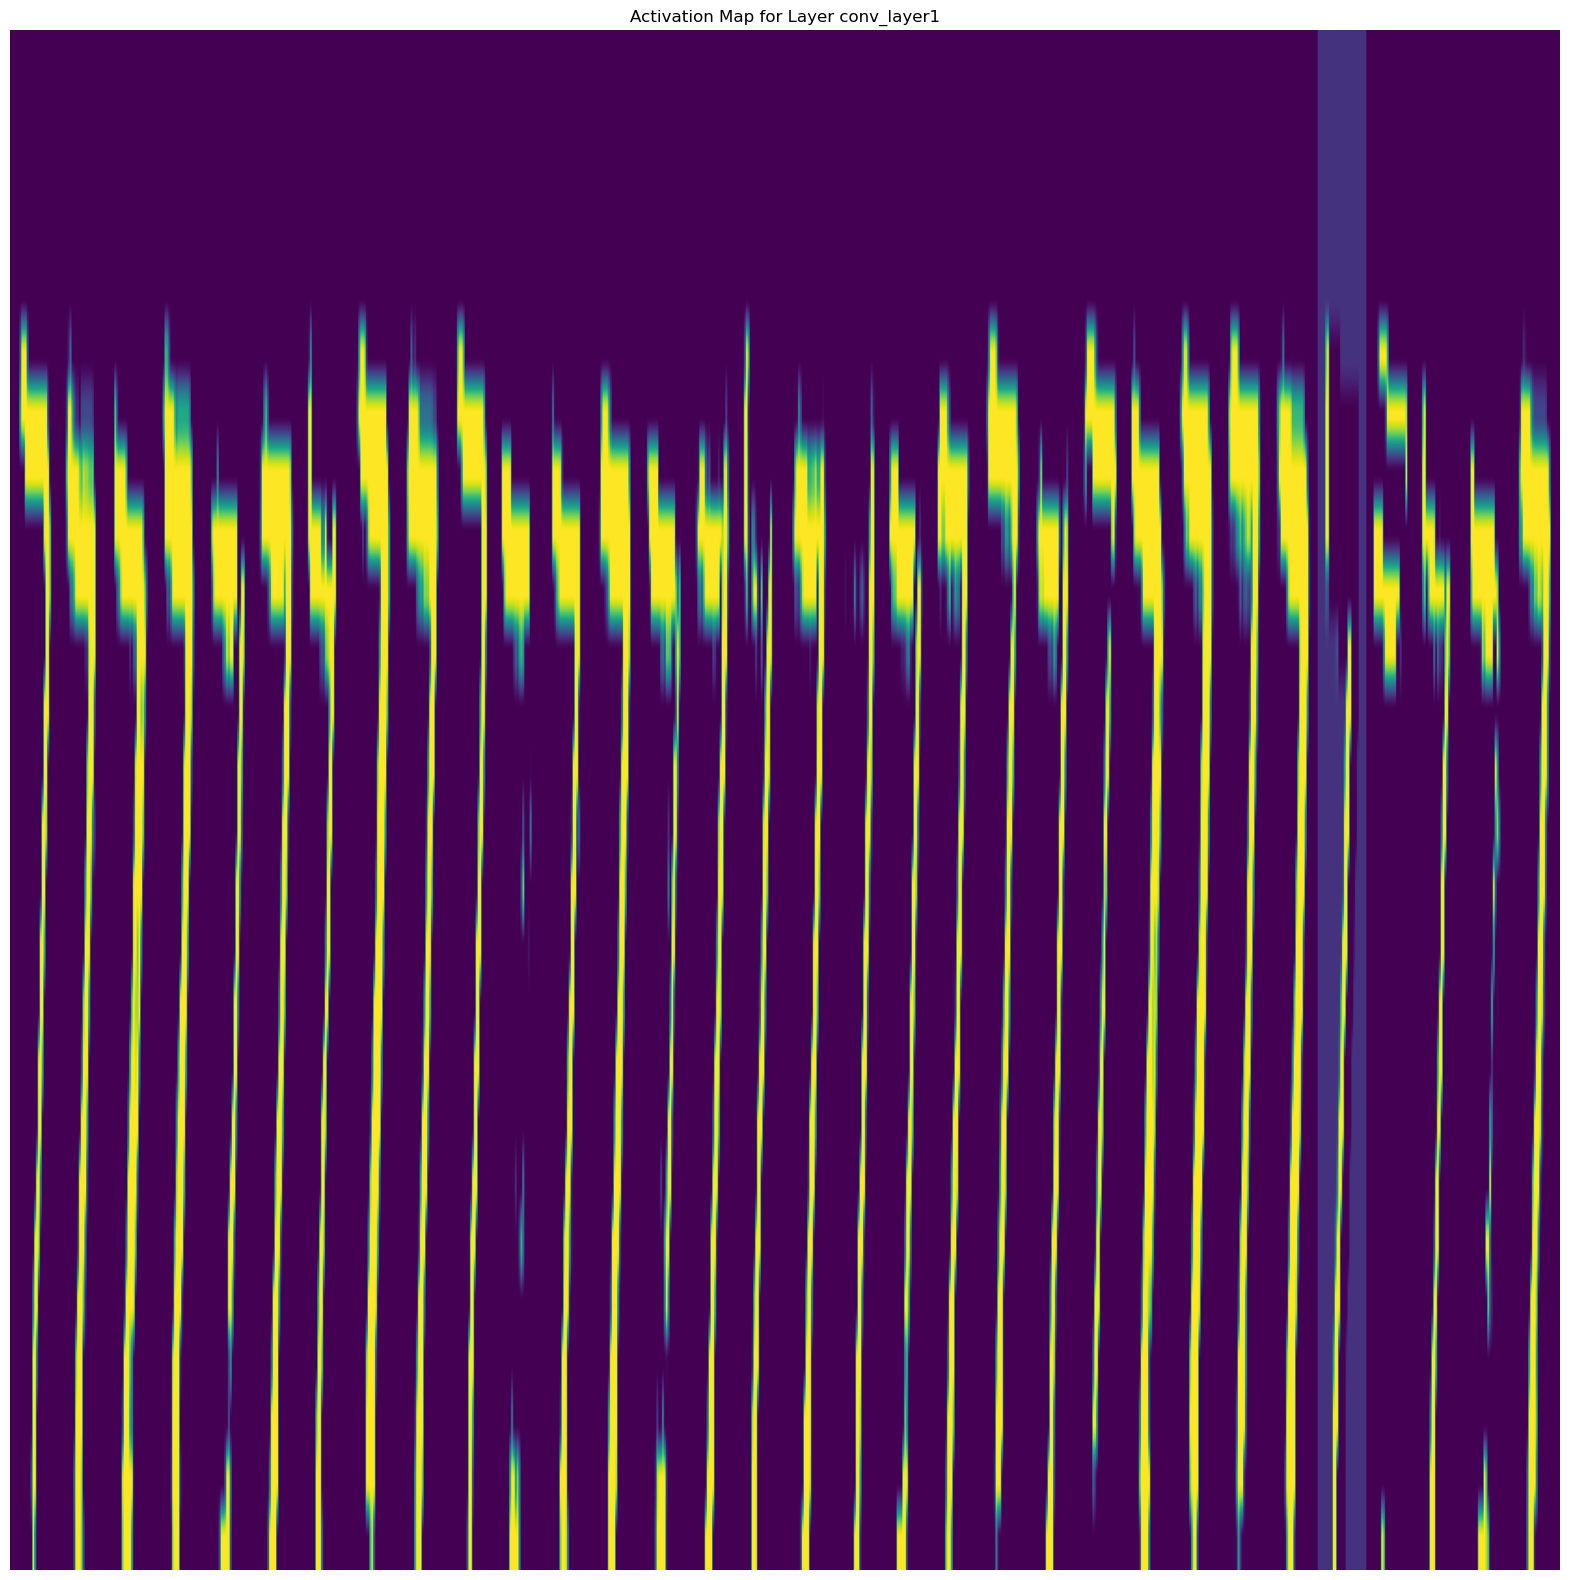

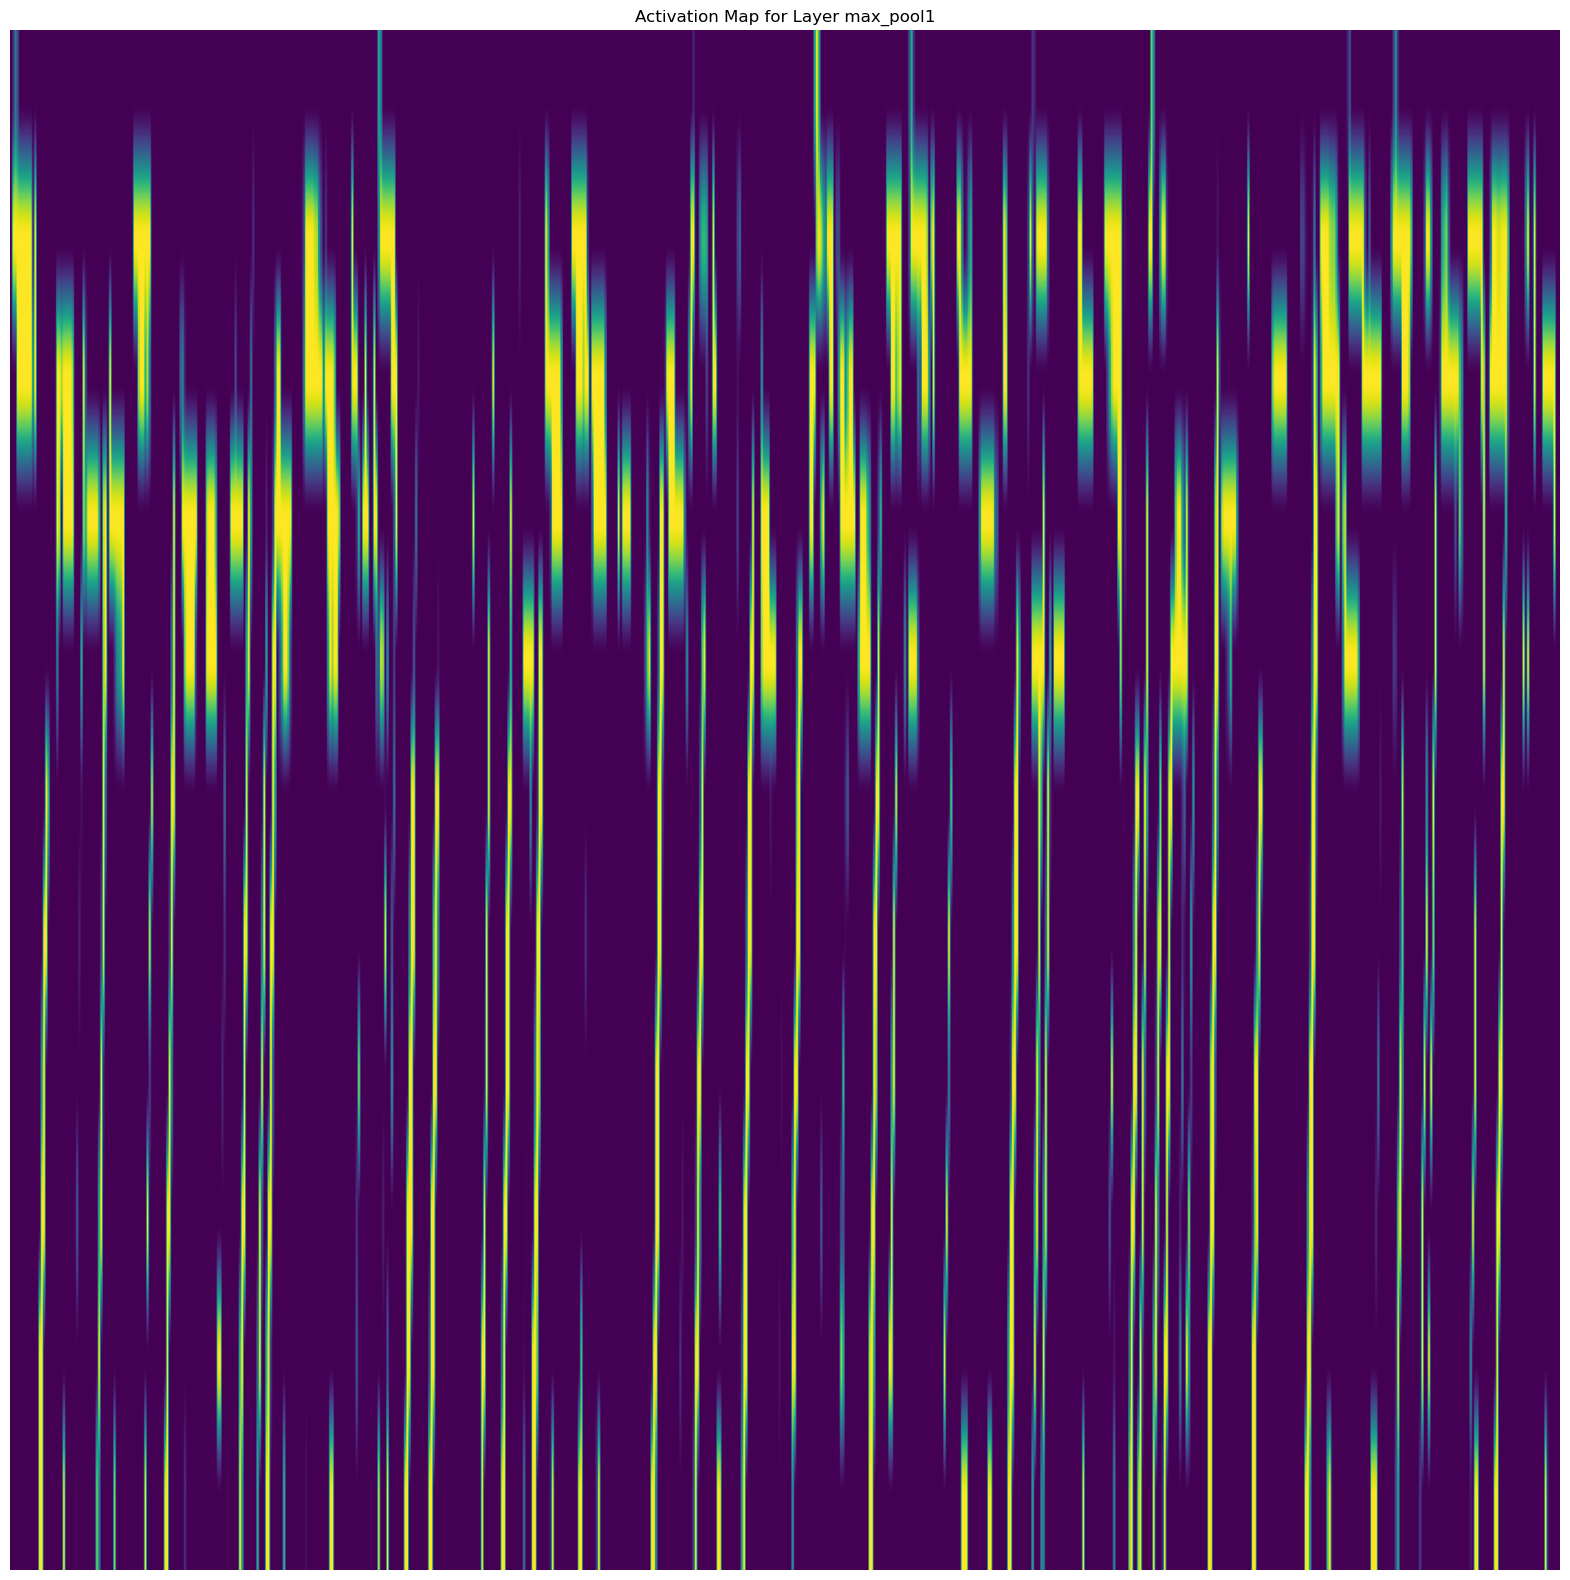

In [7]:
visualize_activation_maps(model, test_image)